In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# --- 1. Load and Prepare Data ---

In [2]:
df = pd.read_csv("./Data/cleanedChurn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7028,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7029,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
RANDOM_SEED = 42

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify numerical columns for scaling
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# --- 2. Data Scaling ---

In [4]:
# It's crucial to scale numerical features before modeling
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\n--- Feature Scaling Complete ---")
print(X[numerical_cols].head())

# --- 3. Train-Test Split ---
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


--- Feature Scaling Complete ---
     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

Training set size: 5625 samples
Testing set size: 1407 samples


# ==============================================================================
## Model 1: Logistic Regression (Baseline Model)
# ==============================================================================


--- MODEL 1: Logistic Regression ---
Accuracy (how often model is correct): 0.8031
Precision (model's correct positive predictions): 0.6474
Recall (model's ability to find all positive samples): 0.5695
F1-Score (harmonic mean of Precision and Recall): 0.6060
ROC-AUC Score: 0.8361


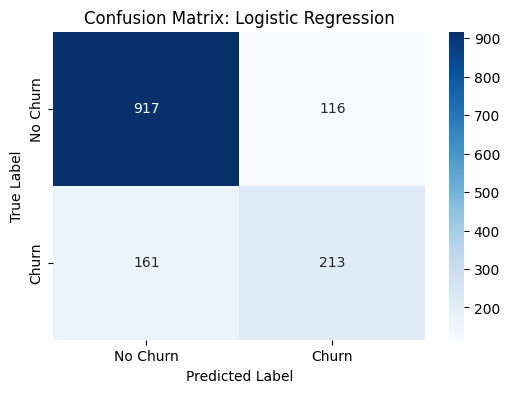

In [5]:
print("\n" + "="*50 + "\n" + "--- MODEL 1: Logistic Regression ---" + "\n" + "="*50)

# Initialize and train the model
log_model = LogisticRegression(random_state=RANDOM_SEED, solver='liblinear')
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

# --- Model Evaluation ---
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc_auc = roc_auc_score(y_test, y_proba_log)

print(f"Accuracy (how often model is correct): {acc:.4f}")
print(f"Precision (model's correct positive predictions): {prec:.4f}")
print(f"Recall (model's ability to find all positive samples): {rec:.4f}")
print(f"F1-Score (harmonic mean of Precision and Recall): {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ==============================================================================
## Model 2: Random Forest Classifier (Performance Model)
# ==============================================================================


--- MODEL 2: Random Forest Classifier ---
Accuracy: 0.7967
Precision: 0.6507
Recall: 0.5080
F1-Score: 0.5706
ROC-AUC Score: 0.8251


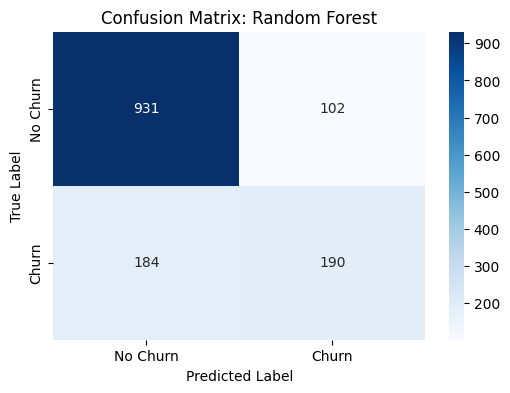

In [6]:
print("\n" + "="*50 + "\n" + "--- MODEL 2: Random Forest Classifier ---" + "\n" + "="*50)

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# --- Model Evaluation ---
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ==============================================================================
## Model Comparison and ROC Curve
# ==============================================================================


--- ROC Curve Comparison ---


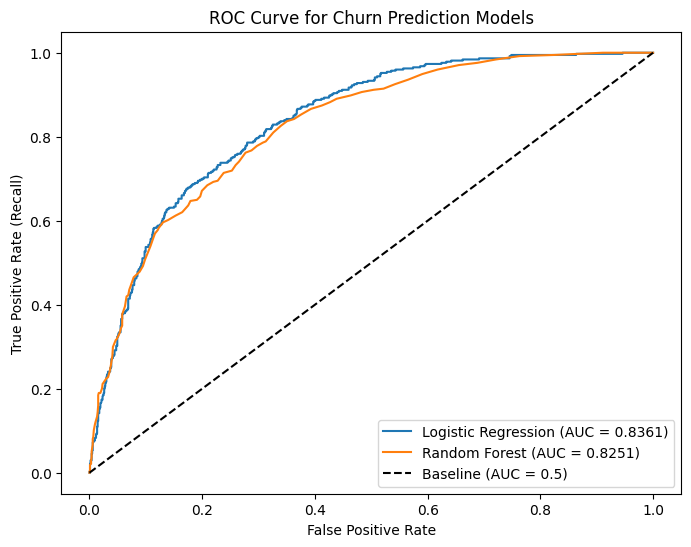

In [7]:
print("\n--- ROC Curve Comparison ---")
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Churn Prediction Models')
plt.legend()
plt.show()